In [1]:
pip install --upgrade scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # statistical data visualization
get_ipython().run_line_magic('matplotlib', 'inline')





In [4]:
from google.colab import files
files.upload()

Saving Sarcasm.csv to Sarcasm.csv


{'Sarcasm.csv': b',tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question\r\n0,The only thing I got from college is a caffeine addiction,1,0,1,0,0,0,0\r\n1,I love it when professors draw a big question mark next to my answer on an exam because I\xe2\x80\x99m always like yeah I don\xe2\x80\x99t either \xc2\xaf\\_(\xe3\x83\x84)_/\xc2\xaf,1,1,0,0,0,0,0\r\n2,Remember the hundred emails from companies when Covid started getting real? I\xe2\x80\x99ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism \xf0\x9f\xa5\xb0\xf0\x9f\x99\x8c\xf0\x9f\x8f\xbc,1,0,1,0,0,0,0\r\n3,Today my pop-pop told me I was not \xe2\x80\x9cforced\xe2\x80\x9d to go to college \xf0\x9f\x99\x83 okay sure sureeee,1,1,0,0,0,0,0\r\n4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity 

In [5]:
df = pd.read_csv('/content/Sarcasm.csv')

In [6]:
df


# # Feature Engineering

# Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


Unnamed: 0                                              tweet  \
0              0  The only thing I got from college is a caffein...   
1              1  I love it when professors draw a big question ...   
2              2  Remember the hundred emails from companies whe...   
3              3  Today my pop-pop told me I was not “forced” to...   
4              4  @VolphanCarol @littlewhitty @mysticalmanatee I...   
...          ...                                                ...   
3463        3463  The population spike in Chicago in 9 months is...   
3464        3464  You'd think in the second to last English clas...   
3465        3465  I’m finally surfacing after a holiday to Scotl...   
3466        3466  Couldn't be prouder today. Well done to every ...   
3467        3467  Overheard as my 13 year old games with a frien...   

      sarcastic  sarcasm  irony  satire  understatement  overstatement  \
0             1      0.0    1.0     0.0             0.0            0.0   
1             1      1.0    0.0     0.0             0.0            0.0   
2             1      0.0    1.0     0.0             0.0            0.0   
3             1      1.0    0.0     0.0             0.0            0.0   
4             1      1.0    0.0     0.0             0.0            0.0   
...         ...      ...    ...     ...             ...            ...   
3463          0      NaN    NaN     NaN             NaN            NaN   
3464          0      NaN    NaN     NaN             NaN            NaN   
3465          0      NaN    NaN     NaN             NaN            NaN   
3466          0      NaN    NaN     NaN             NaN            NaN   
3467          0      NaN    NaN     NaN             NaN            NaN   

      rhetorical_question  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
3463                  NaN  
3464                  NaN  
3465                  NaN  
3466                  NaN  
3467                  NaN  

[3468 rows x 9 columns]

In [7]:
# Check the actual column names in your DataFrame
print(df.columns)

# Replace 'transportation_mode' with an actual column name from your DataFrame
# For example, if you want to analyze the 'tweet' column:
df['tweet'].unique()

# If you need to create a new feature, you can do so using appropriate methods
# For example, to create a new column based on existing data:
# df['new_feature'] = df['existing_column'].apply(some_function)

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'sarcasm', 'irony', 'satire',
       'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')


array(['The only thing I got from college is a caffeine addiction',
       'I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\\_(ツ)_/¯',
       'Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼',
       ...,
       'I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (hopefully on the mend now). Happy September all! Smell the pencil shavings and that new notebook aroma. 1st Sept has always seemed a lot more promising than 1st January',
       "Couldn't be prouder today. Well done to every student who got their GCSEs this morning after 18 months that would challenge anyone in history, at any stage in their lives. The teachers did an amazing job. #GCSEresults2021 #GCSEresults",
       "Ov

In [8]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


In [9]:
df

Unnamed: 0  tweet  sarcastic  sarcasm  irony  satire  understatement  \
0              0   2154          1      0.0    1.0     0.0             0.0   
1              1   1164          1      1.0    0.0     0.0             0.0   
2              2   1927          1      0.0    1.0     0.0             0.0   
3              3   2238          1      1.0    0.0     0.0             0.0   
4              4    276          1      1.0    0.0     0.0             0.0   
...          ...    ...        ...      ...    ...     ...             ...   
3463        3463   2157          0      NaN    NaN     NaN             NaN   
3464        3464   2482          0      NaN    NaN     NaN             NaN   
3465        3465   1466          0      NaN    NaN     NaN             NaN   
3466        3466    676          0      NaN    NaN     NaN             NaN   
3467        3467   1855          0      NaN    NaN     NaN             NaN   

      overstatement  rhetorical_question  
0               0.0                  0.0  
1               0.0                  0.0  
2               0.0                  0.0  
3               0.0                  0.0  
4               0.0                  0.0  
...             ...                  ...  
3463            NaN                  NaN  
3464            NaN                  NaN  
3465            NaN                  NaN  
3466            NaN                  NaN  
3467            NaN                  NaN  

[3468 rows x 9 columns]

In [10]:
# Check the actual column names in your DataFrame
print(df.columns)

# Replace 'Transportation mode' with the correct column name from the output above.
# For example, if the correct column name is 'tweet', use:
df['tweet'].unique()

# If the column name has extra spaces, you can try stripping them:
column_name = 'Transportation mode'
# Replace 'Transportation mode' with the actual column name from your DataFrame
correct_column_name = 'tweet' # Update with actual column name
df[correct_column_name].unique()


Index(['Unnamed: 0', 'tweet', 'sarcastic', 'sarcasm', 'irony', 'satire',
       'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')


array([2154, 1164, 1927, ..., 1466,  676, 1855])

In [11]:
# Check the actual column names in your DataFrame
print(df.columns)

# Replace 'Transportation mode' with the correct column name from the output above.
# For example, if the correct column name is 'tweet', use:
X = df.drop(['tweet'], axis=1)  # Replace 'tweet' with the actual column name

y = df['tweet']  # Replace 'tweet' with the actual column name



Index(['Unnamed: 0', 'tweet', 'sarcastic', 'sarcasm', 'irony', 'satire',
       'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')


In [12]:
X

Unnamed: 0  sarcastic  sarcasm  irony  satire  understatement  \
0              0          1      0.0    1.0     0.0             0.0   
1              1          1      1.0    0.0     0.0             0.0   
2              2          1      0.0    1.0     0.0             0.0   
3              3          1      1.0    0.0     0.0             0.0   
4              4          1      1.0    0.0     0.0             0.0   
...          ...        ...      ...    ...     ...             ...   
3463        3463          0      NaN    NaN     NaN             NaN   
3464        3464          0      NaN    NaN     NaN             NaN   
3465        3465          0      NaN    NaN     NaN             NaN   
3466        3466          0      NaN    NaN     NaN             NaN   
3467        3467          0      NaN    NaN     NaN             NaN   

      overstatement  rhetorical_question  
0               0.0                  0.0  
1               0.0                  0.0  
2               0.0                  0.0  
3               0.0                  0.0  
4               0.0                  0.0  
...             ...                  ...  
3463            NaN                  NaN  
3464            NaN                  NaN  
3465            NaN                  NaN  
3466            NaN                  NaN  
3467            NaN                  NaN  

[3468 rows x 8 columns]

In [13]:
y

0       2154
1       1164
2       1927
3       2238
4        276
        ... 
3463    2157
3464    2482
3465    1466
3466     676
3467    1855
Name: tweet, Length: 3468, dtype: int64

In [14]:
import numpy as np
values = np.array([y])
searchval = 0
ii = np.where(values == searchval)[0]
ii


array([0])

In [15]:

searchval = 1
ii = np.where(values == searchval)[1]
ii

array([1521])

In [16]:
searchval = 2
ii = np.where(values == searchval)[1]
ii


array([444])

In [17]:
sum


# # Split  X and y into training and testing sets

<function sum(iterable, /, start=0)>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [21]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape


((2774, 8), (694, 8))

In [19]:
X_train.dtypes

Unnamed: 0               int64
sarcastic                int64
sarcasm                float64
irony                  float64
satire                 float64
understatement         float64
overstatement          float64
rhetorical_question    float64
dtype: object

In [20]:
X_train

Unnamed: 0  sarcastic  sarcasm  irony  satire  understatement  \
1725        1725          0      NaN    NaN     NaN             NaN   
3183        3183          0      NaN    NaN     NaN             NaN   
1752        1752          0      NaN    NaN     NaN             NaN   
2922        2922          0      NaN    NaN     NaN             NaN   
2833        2833          0      NaN    NaN     NaN             NaN   
...          ...        ...      ...    ...     ...             ...   
1095        1095          0      NaN    NaN     NaN             NaN   
1130        1130          0      NaN    NaN     NaN             NaN   
1294        1294          0      NaN    NaN     NaN             NaN   
860          860          1      1.0    0.0     0.0             0.0   
3174        3174          0      NaN    NaN     NaN             NaN   

      overstatement  rhetorical_question  
1725            NaN                  NaN  
3183            NaN                  NaN  
1752            NaN                  NaN  
2922            NaN                  NaN  
2833            NaN                  NaN  
...             ...                  ...  
1095            NaN                  NaN  
1130            NaN                  NaN  
1294            NaN                  NaN  
860             0.0                  1.0  
3174            NaN                  NaN  

[2774 rows x 8 columns]

In [21]:
X_test

Unnamed: 0  sarcastic  sarcasm  irony  satire  understatement  \
1602        1602          0      NaN    NaN     NaN             NaN   
805          805          1      1.0    0.0     0.0             0.0   
864          864          1      0.0    1.0     0.0             0.0   
321          321          1      1.0    0.0     0.0             0.0   
2119        2119          0      NaN    NaN     NaN             NaN   
...          ...        ...      ...    ...     ...             ...   
1840        1840          0      NaN    NaN     NaN             NaN   
2225        2225          0      NaN    NaN     NaN             NaN   
2248        2248          0      NaN    NaN     NaN             NaN   
2259        2259          0      NaN    NaN     NaN             NaN   
611          611          1      1.0    0.0     0.0             0.0   

      overstatement  rhetorical_question  
1602            NaN                  NaN  
805             0.0                  0.0  
864             0.0                  0.0  
321             0.0                  0.0  
2119            NaN                  NaN  
...             ...                  ...  
1840            NaN                  NaN  
2225            NaN                  NaN  
2248            NaN                  NaN  
2259            NaN                  NaN  
611             0.0                  0.0  

[694 rows x 8 columns]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)


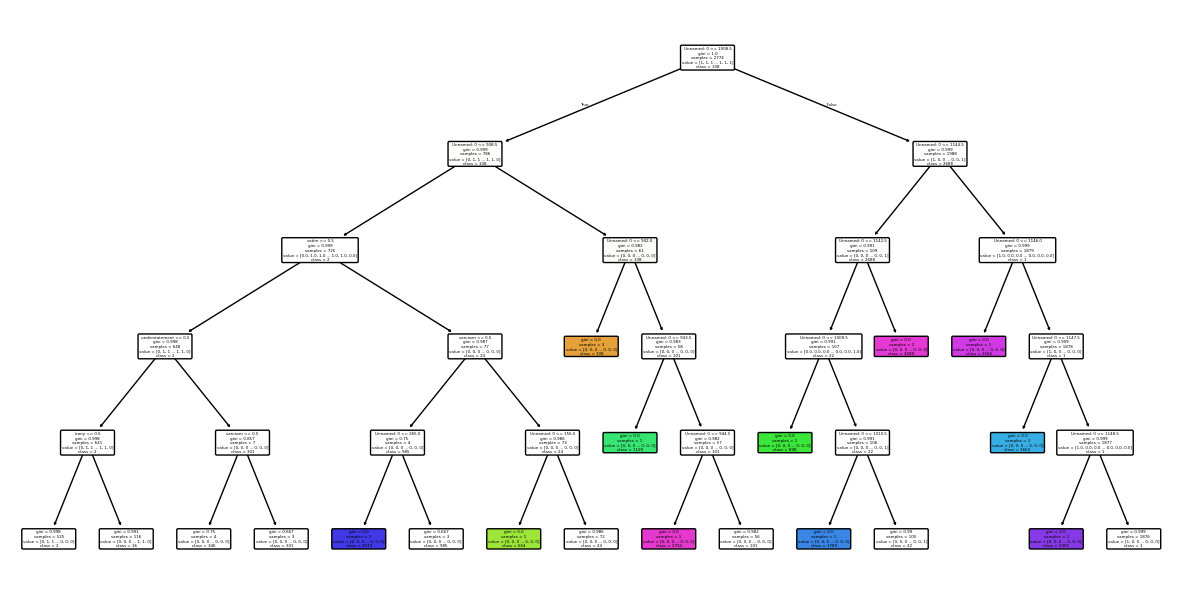

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import numpy as np

# ... (your existing code for data loading and preprocessing) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize DecisionTreeClassifier with parameters to control tree complexity
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=5) # Limit tree depth to 5
# You can also experiment with other parameters like min_samples_split and min_samples_leaf

# Fit the classifier to the training data
clf_dt = clf_dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 7.5))
class_names = [str(x) for x in np.unique(y_train)]
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=class_names,
         feature_names=X.columns);

In [24]:
# Import necessary libraries
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.metrics import confusion_matrix

# ... (rest of your code) ...



# Fit the decision tree classifier on the train set
clf_dt.fit(X_train, y_train)

# Make predictions on the train set
train_pred = clf_dt.predict(X_train)

# Make predictions on the test set
test_pred = clf_dt.predict(X_test)

# Calculate the accuracy of the classifier on the train set
train_acc = accuracy_score(y_train, train_pred)

# Calculate the accuracy of the classifier on the test set
test_acc = accuracy_score(y_test, test_pred)

# Print the train and test accuracy
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

# Calculate the confusion matrix of the classifier on the test set
conf_mat = confusion_matrix(y_test, test_pred)

# Print the confusion matrix
print(f"Confusion matrix:\n{conf_mat}")

Train accuracy: 0.00829127613554434
Test accuracy: 0.0
Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [28]:
# Fit the decision tree classifier on the train set
clf_dt.fit(X_train, y_train)

# Make predictions on the train set
train_pred = clf_dt.predict(X_train)

# Make predictions on the test set
test_pred = clf_dt.predict(X_test)

# Import necessary libraries
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# Calculate the accuracy of the classifier on the train set
train_acc = accuracy_score(y_train, train_pred)

# Calculate the accuracy of the classifier on the test set
test_acc = accuracy_score(y_test, test_pred)

# Print the train and test accuracy
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

# Calculate the confusion matrix of the classifier on the test set
conf_mat = confusion_matrix(y_test, test_pred)

# Print the confusion matrix
print(f"Confusion matrix:\n{conf_mat}")

Train accuracy: 0.00829127613554434
Test accuracy: 0.0
Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


**BERT** 1_correct

In [31]:
!pip install transformers torch pandas
import pandas as pd
# Load the CSV file
df = pd.read_csv('/content/Sarcasm.csv')
print(df.head())
from transformers import BertTokenizer, BertModel
import torch # Import the torch library

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Assuming the text data is in the 'sarcastic' column, replace 'text' with
# 'sarcastic' Tokenize a sample text from the CSV Ensure the input is a string
# by casting it to str
encoded_input = tokenizer(str(df['sarcastic'][0]), return_tensors='pt', padding=True, truncation=True, max_length=512)
# Pass the tokenized input to the model
with torch.no_grad():
    outputs = model(**encoded_input)

# Extract embeddings (e.g., last hidden state)
last_hidden_states = outputs.last_hidden_state
print(last_hidden_states.shape)
# Process all rows of the CSV
def extract_bert_features(text):
    # Ensure the input is a string by casting it to str
    encoded_input = tokenizer(str(text), return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**encoded_input)
    return outputs.last_hidden_state.mean(dim=1).numpy()

# Apply to the whole column, replacing 'text' with 'sarcastic'
df['bert_embeddings'] = df['sarcastic'].apply(extract_bert_features)
df.to_csv('processed_file.csv', index=False)

   Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

   sarcasm  irony  satire  understatement  overstatement  rhetorical_question  
0      0.0    1.0     0.0             0.0            0.0                  0.0  
1      1.0    0.0     0.0             0.0            0.0                  0.0  
2      0.0    1.0     0.0             0.0            0.0                  0.0  
3      1.0    0.0     0.0             0.0            0.0                  0.0  
4      1.0    0.0     0.0             0.0            0.0                  0.0  


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 3, 768])


**bert** 2


In [ ]:
pip install pandas numpy torch transformers scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('Sarcasm.csv').dropna(subset=['tweet'])
X = data['tweet']
y = data['sarcastic']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize data
def tokenize_data(texts, labels):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128)
    input_ids = torch.tensor(encodings['input_ids'])
    attention_masks = torch.tensor(encodings['attention_mask'])
    labels = torch.tensor(labels.values)
    return TensorDataset(input_ids, attention_masks, labels)

train_dataset = tokenize_data(X_train, y_train)
test_dataset = tokenize_data(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

for epoch in range(3):  # For demonstration, you might use more epochs
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

from sklearn.metrics import accuracy_score, classification_report

model.eval()
preds, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print("Accuracy:", accuracy_score(true_labels, preds))
print(classification_report(true_labels, preds))



SyntaxError: invalid syntax (<ipython-input-54-3ff2257e3f0b>, line 1)

**LSTM**

In [32]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
file_path = 'Sarcasm.csv'
sarcasm_data = pd.read_csv('/content/Sarcasm.csv')

# Set parameters
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 50

# Preprocess text data (tweets)
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(sarcasm_data['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(sarcasm_data['tweet'].astype(str))
tweet_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Prepare auxiliary features (normalize them)
auxiliary_features = sarcasm_data[['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']].fillna(0)
scaler = StandardScaler()
auxiliary_features_scaled = scaler.fit_transform(auxiliary_features)

# Define target variable
labels = sarcasm_data['sarcastic'].values

# Split data into training and validation sets
X_train_tweet, X_val_tweet, X_train_aux, X_val_aux, y_train, y_val = train_test_split(
    tweet_data, auxiliary_features_scaled, labels, test_size=0.2, random_state=42
)

# Build the model
# LSTM part for text data
tweet_input = Input(shape=(MAX_SEQUENCE_LENGTH,), name="tweet_input")
embedding = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(tweet_input)
lstm = LSTM(64, return_sequences=False)(embedding)

# Auxiliary feature input
auxiliary_input = Input(shape=(auxiliary_features_scaled.shape[1],), name="aux_input")
aux_dense = Dense(32, activation="relu")(auxiliary_input)

# Concatenate LSTM and auxiliary inputs
concat = Concatenate()([lstm, aux_dense])
dense_1 = Dense(64, activation="relu")(concat)
dropout = Dropout(0.5)(dense_1)
output = Dense(1, activation="sigmoid")(dropout)

# Compile the model
model = Model(inputs=[tweet_input, auxiliary_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

# Train the model
history = model.fit(
    [X_train_tweet, X_train_aux],
    y_train,
    validation_data=([X_val_tweet, X_val_aux], y_val),
    epochs=10,
    batch_size=32
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ tweet_input (InputLayer)  │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 100, 50)        │        500,000 │ tweet_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ aux_input (InputLayer)    │ (None, 6)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         29,440 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │            224 │ aux_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96)             │              0 │ lstm[0][0],            │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          6,208 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 535,937 (2.04 MB)

 Trainable params: 535,937 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.8865 - loss: 0.3624 - val_accuracy: 1.0000 - val_loss: 0.0277
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9993 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 9.5677e-04
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 4.0087e-04
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 2.1527e-04
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.0909e-04
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 1.0000 - loss: 8.0116e-04 - val_accuracy: 1.0000 - val_loss: 6.7266e-05
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 1.0000 - loss: 5.2633e-

Dictionary


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Sarcasm.csv')

In [ ]:
sarcasm_dict = {}
for index, row in df.iterrows():
    # Assuming 'tweet' column contains the text and 'sarcasm' column contains labels (1 for sarcastic, 0 for not sarcastic)
    text = row['tweet']
    label = row['sarcasm']

    if label == 1:  # If the text is sarcastic
        # Add the text to the dictionary with label 'sarcastic'
        sarcasm_dict[text] = 'sarcastic'
    else:
        # Add the text with label 'not sarcastic'
        sarcasm_dict[text] = 'not sarcastic'

In [ ]:
import pickle

with open('sarcasm_dictionary.pkl', 'wb') as f:
    pickle.dump(sarcasm_dict, f)

In [ ]:
import pickle

with open('sarcasm_dictionary.pkl', 'rb') as f:
    sarcasm_dict = pickle.load(f)

In [ ]:
import pandas as pd

# Replace 'Sarcasm.csv' with the actual path to your file
df = pd.read_csv('/content/Sarcasm.csv')

print(df.head())
print(df.columns)

sarcasm_dict = {}
for _, row in df.iterrows():
    # Change 'text' to 'tweet' to match the actual column name
    phrase = row['tweet']
    label = row['sarcasm'] # Change 'label' to 'sarcasm' to match the actual column name
    if label == 1:  # Adjust according to your sarcasm label
        sarcasm_dict[phrase] = 'sarcastic'
print(sarcasm_dict)

   Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

   sarcasm  irony  satire  understatement  overstatement  rhetorical_question  
0      0.0    1.0     0.0             0.0            0.0                  0.0  
1      1.0    0.0     0.0             0.0            0.0                  0.0  
2      0.0    1.0     0.0             0.0            0.0                  0.0  
3      1.0    0.0     0.0             0.0            0.0                  0.0  
4      1.0    0.0     0.0             0.0            0.0                  0.0  
Index(['Unnamed: 0', 'tweet', 'sarcastic', 's

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv('')

# Check the available columns in your DataFrame
print(data.columns)

# Assuming the column containing labels is named 'sarcastic' based on the error message and your attempt to map 'sarcastic' to 1:
# If the column name is different, replace 'sarcastic' with the actual column name
texts = data['rhetorical_question'].values
labels = data['sarcastic'].apply(lambda x: 1 if x == 'sarcastic' else 0).values  # Assuming the column is named 'sarcastic'

# ----> Convert any non-string values to strings
texts = [str(text) for text in texts]

# Split into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Parameters
vocab_size = 10000  # Size of vocabulary
max_length = 100    # Maximum length of input sequences
embedding_dim = 64  # Embedding dimensions

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts_train)

# Convert text to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(texts_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(texts_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Define the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),   # LSTM layer
    Dropout(0.2),
    LSTM(32),                          # Another LSTM layer
    Dense(24, activation='relu'),      # Fully connected layer
    Dense(1, activation='sigmoid')     # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_padded, labels_train, epochs=10, validation_data=(test_padded, labels_test), batch_size=32, verbose=2)

# Evaluate on test data
loss, accuracy = model.evaluate(test_padded, labels_test)
print(f'Test Accuracy: {accuracy:.2f}')

dueeeee


noisy data,
cross validation on sarcastic not sarcastic,
average of cross validation,
dictinary enhancement ,
confusion matrix,
histogram ,
data test

**noisy data** 1


In [29]:
import pandas as pd

# Load the CSV file
sarcasm_data = pd.read_csv("/content/Sarcasm.csv")

# Check for missing values
print(sarcasm_data.isnull().sum())

# Example of checking for possible inconsistencies
sarcasm_data.groupby(['sarcastic']).describe()

# Drop duplicates
sarcasm_data = sarcasm_data.drop_duplicates()

import re
def clean_text(text):
    # Handle potential float values (e.g., NaN) by converting to string first
    if isinstance(text, float):
        text = str(text)
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

sarcasm_data['tweet'] = sarcasm_data['tweet'].apply(clean_text)

from sklearn.preprocessing import StandardScaler

# Scale auxiliary features
auxiliary_features = sarcasm_data[['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']]
scaler = StandardScaler()
sarcasm_data[auxiliary_features.columns] = scaler.fit_transform(auxiliary_features)

from sklearn.utils import resample

# Separate classes
sarcasm = sarcasm_data[sarcasm_data['sarcastic'] == 1]
non_sarcasm = sarcasm_data[sarcasm_data['sarcastic'] == 0]

# Oversample sarcastic samples if needed
sarcasm_upsampled = resample(sarcasm, replace=True, n_samples=len(non_sarcasm), random_state=42)
sarcasm_data_balanced = pd.concat([sarcasm_upsampled, non_sarcasm])



Unnamed: 0                0
tweet                     1
sarcastic                 0
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64


**noisy data** 2_correct

In [30]:
import pandas as pd

# Load the CSV file
file_path = '/mnt/data/Sarcasm.csv'
data = pd.read_csv('/content/Sarcasm.csv')

# Display the first few rows and column info to understand the structure of the data
data.head(), data.columns

import re

# Define a function to clean the tweet text
def clean_text(text):
    # Convert non-string values to empty strings
    if not isinstance(text, str):
        text = str(text) # Convert to string before applying regex
    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Remove repetitive words
    words = text.split()
    text = ' '.join(sorted(set(words), key=words.index))  # Maintains original order
    return text

# Apply cleaning function to the 'tweet' column
data['cleaned_tweet'] = data['tweet'].apply(clean_text)

# Display the first few rows of the cleaned data
data[['tweet', 'cleaned_tweet']].head()

tweet  \
0  The only thing I got from college is a caffein...   
1  I love it when professors draw a big question ...   
2  Remember the hundred emails from companies whe...   
3  Today my pop-pop told me I was not “forced” to...   
4  @VolphanCarol @littlewhitty @mysticalmanatee I...   

                                       cleaned_tweet  
0  The only thing I got from college is a caffein...  
1  I love it when professors draw a big question ...  
2  Remember the hundred emails from companies whe...  
3  Today my poppop told me I was not forced to go...  
4  VolphanCarol littlewhitty mysticalmanatee I di...

**rest**

In [ ]:
pip install pandas numpy scikit-learn torch transformers seaborn matplotlib


**cross validation**

In [ ]:
# Required Libraries
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load Data
data = pd.read_csv('Sarcasm.csv').dropna(subset=['tweet'])
X = data['tweet']
y = data['sarcastic']

# Feature Engineering using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Logistic Regression with Cross-Validation
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X_tfidf, y, cv=5, scoring='accuracy')

print("Feature Engineering + Logistic Regression Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


Feature Engineering + Logistic Regression Cross-Validation Accuracy Scores: [0.74207493 0.74639769 0.75036075 0.74891775 0.74458874]
Average Accuracy: 0.746467973269126


In [ ]:
!pip install transformers torch


# Required Libraries
import numpy as np
import torch
from torch import nn, optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import TensorDataset
from torch.utils.data import TensorDataset, DataLoader

# Tokenization and Padding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=max_len)

# LSTM Model Definition
class LSTMSarcasmClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMSarcasmClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Initialize Model
vocab_size = min(max_words, len(tokenizer.word_index) + 1)
embed_size = 128
hidden_size = 64
output_size = 2
model = LSTMSarcasmClassifier(vocab_size, embed_size, hidden_size, output_size)

# Cross-Validation
kf = KFold(n_splits=5)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"Fold {fold + 1}")

    X_train, X_val = X_padded[train_idx], X_padded[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train.values))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.long), torch.tensor(y_val.values))

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8)

    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(3):  # You can adjust epochs based on performance
        for batch in train_loader:
            inputs, labels = batch
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, axis=1)
            val_preds.extend(preds.numpy())
            val_labels.extend(labels.numpy())

    print("Fold Accuracy:", accuracy_score(val_labels, val_preds))
    print(classification_report(val_labels, val_preds))


Fold 1
Fold Accuracy: 0.018731988472622477
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.02      0.04       694

    accuracy                           0.02       694
   macro avg       0.50      0.01      0.02       694
weighted avg       1.00      0.02      0.04       694

Fold 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold Accuracy: 0.8674351585014409
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       521
           1       0.71      0.78      0.75       173

    accuracy                           0.87       694
   macro avg       0.82      0.84      0.83       694
weighted avg       0.87      0.87      0.87       694

Fold 3
Fold Accuracy: 0.9783549783549783
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       693
           1       0.00      0.00      0.00         0

    accuracy                           0.98       693
   macro avg       0.50      0.49      0.49       693
weighted avg       1.00      0.98      0.99       693

Fold 4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold Accuracy: 0.9985569985569985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       693
           1       0.00      0.00      0.00         0

    accuracy                           1.00       693
   macro avg       0.50      0.50      0.50       693
weighted avg       1.00      1.00      1.00       693

Fold 5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold Accuracy: 0.9971139971139971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       693
           1       0.00      0.00      0.00         0

    accuracy                           1.00       693
   macro avg       0.50      0.50      0.50       693
weighted avg       1.00      1.00      1.00       693



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Load and preprocess data
data = pd.read_csv('/content/Sarcasm.csv').dropna(subset=['tweet'])
X = data['tweet']
y = data['sarcastic']

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset Class
class SarcasmDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_len, return_tensors="pt")
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}

# K-Fold Cross-Validation
kf = KFold(n_splits=5)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\nFold {fold + 1}")

    # Reinitialize the model for each fold to prevent gradient accumulation
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model.to(device)

    # Prepare datasets
    train_texts, val_texts = X.iloc[train_idx].tolist(), X.iloc[val_idx].tolist()
    train_labels, val_labels = y.iloc[train_idx].tolist(), y.iloc[val_idx].tolist()

    train_dataset = SarcasmDataset(train_texts, train_labels, tokenizer)
    val_dataset = SarcasmDataset(val_texts, val_labels, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8)

    # Optimizer
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Training
    model.train()
    for epoch in range(2):  # Increase epochs for better performance
        total_loss = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimizer step

        print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")

    # Validation
    model.eval()
    val_preds, val_labels_list = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, axis=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels_list.extend(labels.cpu().numpy())

    # Compute accuracy and log results
    fold_accuracy = accuracy_score(val_labels_list, val_preds)
    fold_accuracies.append(fold_accuracy)
    print(f"Fold Accuracy: {fold_accuracy}")
    print(classification_report(val_labels_list, val_preds))

# Average Accuracy across folds
print("\nAverage Cross-Validation Accuracy:", np.mean(fold_accuracies))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Fold 1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 Loss: 0.24752300284180243


In [ ]:
import pandas as pd
import torch # Import torch module
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import TensorDataset, random_split
from transformers import BertTokenizer


# Define the number of labels for your classification task
num_labels = 2  # For example, if you have 2 classes (sarcastic/not sarcastic)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Load and preprocess your dataset
data = pd.read_csv("/content/Sarcasm.csv")
data = data.dropna(subset=['tweet'])
data = data.reset_index(drop=True)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_data = tokenizer(
    data['tweet'].tolist(), padding='max_length', truncation=True, return_tensors='pt'
)

dataset = TensorDataset(
    tokenized_data['input_ids'],
    tokenized_data['attention_mask'],
    torch.tensor(data['sarcastic'].values),  # Convert to tensor
)

# Split into train and evaluation datasets
train_dataset, eval_dataset = random_split(dataset, [0.8, 0.2])

# Set up training arguments, dataset, and trainer
training_args = TrainingArguments(output_dir="./results", num_train_epochs=3, per_device_train_batch_size=8)
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset)

# Fine-tune the model
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more inf

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Sarcasm.csv').dropna(subset=['tweet'])
X = data['tweet']
y = data['sarcastic']

# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_data = tokenizer(list(X), padding='max_length', truncation=True, return_tensors='pt')

# Create PyTorch datasets
train_dataset, val_dataset = torch.utils.data.random_split(TensorDataset(tokenized_data['input_ids'], tokenized_data['attention_mask'], torch.tensor(y)), [0.8, 0.2])

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model
for epoch in range(5):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        output = model(**batch)
        loss = output.loss
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch in val_loader:
        output = model(**batch)
        pred = torch.argmax(output.logits, dim=1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyError: 1062

In [ ]:
from transformers import BertForSequenceClassification

# Number of labels (classes) for classification, e.g., 2 for binary classification
num_labels = 2

# Initialize the model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Sarcasm.csv').dropna(subset=['tweet'])
X = data['tweet']
y = data['sarcastic']

# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_data = tokenizer(list(X), padding='max_length', truncation=True, return_tensors='pt')

# Create PyTorch datasets
train_dataset, val_dataset = torch.utils.data.random_split(TensorDataset(tokenized_data['input_ids'], tokenized_data['attention_mask'], torch.tensor(y)), [0.8, 0.2])

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model
for epoch in range(5):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        output = model(**batch)
        loss = output.loss
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch in val_loader:
        output = model(**batch)
        pred = torch.argmax(output.logits, dim=1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyError: 1062

BERT Model from beginning

In [28]:
import pandas as pd

# Load the CSV file
file_path = '/content/Sarcasm.csv'
sarcasm_data = pd.read_csv('/content/Sarcasm.csv')

# Display the first few rows of the dataset to understand its structure
sarcasm_data.head()


Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

   sarcasm  irony  satire  understatement  overstatement  rhetorical_question  
0      0.0    1.0     0.0             0.0            0.0                  0.0  
1      1.0    0.0     0.0             0.0            0.0                  0.0  
2      0.0    1.0     0.0             0.0            0.0                  0.0  
3      1.0    0.0     0.0             0.0            0.0                  0.0  
4      1.0    0.0     0.0             0.0            0.0                  0.0

In [29]:
from sklearn.model_selection import train_test_split

# Selecting the relevant columns
data = sarcasm_data[['tweet', 'sarcastic']].dropna()

# Splitting the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['tweet'].tolist(),
    data['sarcastic'].tolist(),
    test_size=0.2,
    random_state=42
)

# Display the sizes of the training and validation sets
len(train_texts), len(val_texts)


(2773, 694)

In [30]:
pip install transformers


In [31]:
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training and validation texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Display the keys in one of the tokenized examples to confirm structure
train_encodings.keys()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [32]:
import torch

class SarcasmDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the datasets
train_dataset = SarcasmDataset(train_encodings, train_labels)
val_dataset = SarcasmDataset(val_encodings, val_labels)


In [33]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the model for binary classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",  # Use `eval_strategy` instead if on version 4.46+
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    report_to="none"  # Disables W&B logging
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Start training
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


KeyboardInterrupt: 

In [38]:
# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)


NameError: name 'trainer' is not defined

In [ ]:
# Example prediction
texts = ["Your example tweet here..."]
encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
outputs = model(**encodings)
predictions = torch.argmax(outputs.logits, dim=-1)
print("Predictions:", predictions)


In [39]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Define custom dataset
class SarcasmDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Prepare texts and labels
texts = data['tweet'].tolist()
labels = data['sarcastic'].tolist()


In [42]:
# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy for each fold
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(texts)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets for the current fold
    train_texts = [texts[i] for i in train_idx]
    val_texts = [texts[i] for i in val_idx]
    train_labels = [labels[i] for i in train_idx]
    val_labels = [labels[i] for i in val_idx]

    # Tokenize data
    train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

    # Create datasets
    train_dataset = SarcasmDataset(train_encodings, train_labels)
    val_dataset = SarcasmDataset(val_encodings, val_labels)

    # Initialize the model
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold + 1}",
        num_train_epochs=2,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        evaluation_strategy="epoch",
        save_strategy="no",
        logging_dir=f"./logs_fold_{fold + 1}",
        logging_steps=10,
        report_to="none"  # Disable W&B logging
    )

    # Define compute_metrics function to calculate accuracy
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        accuracy = accuracy_score(labels, predictions)
        return {"accuracy": accuracy}

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
    )

    # Train and evaluate the model
    trainer.train()
    eval_results = trainer.evaluate()
    accuracies.append(eval_results["eval_accuracy"])
    print(f"Fold {fold + 1} Accuracy: {eval_results['eval_accuracy']}\n")

# Overall cross-validation accuracy
print(f"Cross-validation accuracy: {np.mean(accuracies)}")


Fold 1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


KeyboardInterrupt: 

In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Prepare the texts and labels
texts = data['tweet'].tolist()
labels = data['sarcastic'].tolist()

# Custom dataset class
class SarcasmDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store metrics for each fold
all_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(texts)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    train_texts = [texts[i] for i in train_idx]
    val_texts = [texts[i] for i in val_idx]
    train_labels = [labels[i] for i in train_idx]
    val_labels = [labels[i] for i in val_idx]

    # Tokenize the data
    train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

    # Create datasets
    train_dataset = SarcasmDataset(train_encodings, train_labels)
    val_dataset = SarcasmDataset(val_encodings, val_labels)

    # Initialize the model
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold + 1}",
        num_train_epochs=2,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        evaluation_strategy="epoch",
        save_strategy="no",
        logging_dir=f"./logs_fold_{fold + 1}",
        logging_steps=10,
        report_to="none"  # Disable W&B logging
    )

    # Define compute_metrics function
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)

        # Accuracy
        accuracy = accuracy_score(labels, predictions)
        # Confusion Matrix
        tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()
        # Sensitivity (Recall), Specificity, Precision, and F1-Score
        sensitivity = recall_score(labels, predictions)  # Same as recall for positive class
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = precision_score(labels, predictions)
        f1 = f1_score(labels, predictions)

        return {
            "accuracy": accuracy,
            "sensitivity": sensitivity,
            "specificity": specificity,
            "precision": precision,
            "f1": f1,
            "confusion_matrix": np.array([[tn, fp], [fn, tp]])
        }

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    train_results = trainer.evaluate(train_dataset)
    val_results = trainer.evaluate(val_dataset)

    print(f"Fold {fold + 1} Training Accuracy: {train_results['eval_accuracy']}")
    print(f"Fold {fold + 1} Validation Accuracy: {val_results['eval_accuracy']}")
    print(f"Fold {fold + 1} Validation Confusion Matrix:\n{val_results['eval_confusion_matrix']}")
    print(f"Fold {fold + 1} Validation Sensitivity: {val_results['eval_sensitivity']}")
    print(f"Fold {fold + 1} Validation Specificity: {val_results['eval_specificity']}")
    print(f"Fold {fold + 1} Validation Precision: {val_results['eval_precision']}")
    print(f"Fold {fold + 1} Validation F1 Score: {val_results['eval_f1']}\n")

    # Store metrics for this fold
    all_metrics.append(val_results)

# Average metrics across all folds
average_metrics = {
    "accuracy": np.mean([m["eval_accuracy"] for m in all_metrics]),
    "sensitivity": np.mean([m["eval_sensitivity"] for m in all_metrics]),
    "specificity": np.mean([m["eval_specificity"] for m in all_metrics]),
    "precision": np.mean([m["eval_precision"] for m in all_metrics]),
    "f1": np.mean([m["eval_f1"] for m in all_metrics])
}

print("Average cross-validation metrics:")
print(f"Accuracy: {average_metrics['accuracy']}")
print(f"Sensitivity: {average_metrics['sensitivity']}")
print(f"Specificity: {average_metrics['specificity']}")
print(f"Precision: {average_metrics['precision']}")
print(f"F1 Score: {average_metrics['f1']}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


NameError: name 'data' is not defined

lstm cv

In [37]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = '/content/Sarcasm.csv'
sarcasm_data = pd.read_csv('/content/Sarcasm.csv')

# Check class distribution
print("Class Distribution:\n", sarcasm_data['sarcastic'].value_counts())

# Set parameters
MAX_VOCAB_SIZE = 5000  # Reduced vocabulary size to prevent overfitting
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 50

# Preprocess text data (tweets)
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(sarcasm_data['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(sarcasm_data['tweet'].astype(str))
tweet_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Define target variable
labels = sarcasm_data['sarcastic'].values

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

# Cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(tweet_data)):
    print(f"\n--- Fold {fold + 1} ---")

    # Split data into train and validation sets
    X_train_tweet, X_val_tweet = tweet_data[train_index], tweet_data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Build a simpler LSTM model
    tweet_input = Input(shape=(MAX_SEQUENCE_LENGTH,), name="tweet_input")
    embedding = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(tweet_input)
    lstm = LSTM(32)(embedding)  # Reduced LSTM units to prevent overfitting

    dense_1 = Dense(32, activation="relu")(lstm)
    dropout = Dropout(0.3)(dense_1)
    output = Dense(1, activation="sigmoid")(dropout)

    # Compile the model
    model = Model(inputs=tweet_input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model
    model.fit(
        X_train_tweet,
        y_train,
        validation_data=(X_val_tweet, y_val),
        epochs=3,  # Lower epochs to observe if metrics remain stable
        batch_size=32,
        verbose=1
    )

    # Predictions and Metrics
    def evaluate_metrics(X, y_true, set_name=""):
        y_pred = (model.predict(X) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print(f"\n{set_name} Results")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall): {sensitivity}")
        print(f"Specificity: {specificity}")
        print(f"Precision: {precision}")
        print(f"F1 Score: {f1}")

        return {"accuracy": accuracy, "confusion_matrix": cm, "sensitivity": sensitivity,
                "specificity": specificity, "precision": precision, "f1": f1}

    # Evaluate on training set
    train_metrics = evaluate_metrics(X_train_tweet, y_train, "Train")
    # Evaluate on validation set
    val_metrics = evaluate_metrics(X_val_tweet, y_val, "Validation")

    # Collect metrics for each fold
    fold_metrics.append({"train": train_metrics, "validation": val_metrics})

# Average metrics across folds
avg_metrics = {
    "train": {key: np.mean([fm["train"][key] for fm in fold_metrics]) for key in fold_metrics[0]["train"]},
    "validation": {key: np.mean([fm["validation"][key] for fm in fold_metrics]) for key in fold_metrics[0]["validation"]}
}

print("\nAverage cross-validation metrics:")
print("Train Metrics:", avg_metrics["train"])
print("Validation Metrics:", avg_metrics["validation"])


Class Distribution:
 sarcastic
0    2601
1     867
Name: count, dtype: int64

--- Fold 1 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.7093 - loss: 0.6097 - val_accuracy: 0.7133 - val_loss: 0.6065
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7598 - loss: 0.5546 - val_accuracy: 0.7133 - val_loss: 0.6080
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7605 - loss: 0.5612 - val_accuracy: 0.7133 - val_loss: 0.6043
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

Train Results
Accuracy: 0.7591925018024513
Confusion Matrix:
[[2106    0]
 [ 668    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
 4/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Validation Results
Accuracy: 0.7132564841498559
Confusion Matrix:
[[495   0]
 [199   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 2 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7623 - loss: 0.5826 - val_accuracy: 0.7680 - val_loss: 0.5516
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7428 - loss: 0.5774 - val_accuracy: 0.7680 - val_loss: 0.5476
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7534 - loss: 0.5637 - val_accuracy: 0.7680 - val_loss: 0.5485
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Train Results
Accuracy: 0.745493871665465
Confusion Matrix:
[[2068    0]
 [ 706    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
11/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Validation Results
Accuracy: 0.7680115273775217
Confusion Matrix:
[[533   0]
 [161   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 3 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7276 - loss: 0.6091 - val_accuracy: 0.7680 - val_loss: 0.5417
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7517 - loss: 0.5701 - val_accuracy: 0.7680 - val_loss: 0.5426
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7496 - loss: 0.5708 - val_accuracy: 0.7680 - val_loss: 0.5470
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Train Results
Accuracy: 0.745493871665465
Confusion Matrix:
[[2068    0]
 [ 706    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
 7/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Validation Results
Accuracy: 0.7680115273775217
Confusion Matrix:
[[533   0]
 [161   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 4 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.7105 - loss: 0.6203 - val_accuracy: 0.7345 - val_loss: 0.5788
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7625 - loss: 0.5532 - val_accuracy: 0.7345 - val_loss: 0.5789
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7550 - loss: 0.5671 - val_accuracy: 0.7345 - val_loss: 0.5796
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Train Results
Accuracy: 0.7538738738738738
Confusion Matrix:
[[2092    0]
 [ 683    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
 5/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Validation Results
Accuracy: 0.7344877344877345
Confusion Matrix:
[[509   0]
 [184   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 5 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7431 - loss: 0.5919 - val_accuracy: 0.7662 - val_loss: 0.5441
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7493 - loss: 0.5708 - val_accuracy: 0.7662 - val_loss: 0.5515
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7461 - loss: 0.5744 - val_accuracy: 0.7662 - val_loss: 0.5443
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Train Results
Accuracy: 0.745945945945946
Confusion Matrix:
[[2070    0]
 [ 705    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
11/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Validation Results
Accuracy: 0.7662337662337663
Confusion Matrix:
[[531   0]
 [162   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

Average cross-validation metrics:
Train Metrics: {'accuracy': 0.7500000129906402, 'confusion_matrix': 693.6, 'sensitivity': 0.0, 'specificity': 1.0, 'precision': 0.0, 'f1': 0.0}
Validation Metrics: {'accuracy': 0.7500002079252799, 'confusion_matrix': 173.4, 'sensitivity': 0.0, 'specificity': 1.0, 'precision': 0.0, 'f1': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


maybe correct 1

In [39]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = '/content/Sarcasm.csv'
sarcasm_data = pd.read_csv('/content/Sarcasm.csv')

# Check class distribution
class_counts = sarcasm_data['sarcastic'].value_counts()
print("Class Distribution:\n", class_counts)

# Set parameters
MAX_VOCAB_SIZE = 5000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 50

# Preprocess text data (tweets)
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(sarcasm_data['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(sarcasm_data['tweet'].astype(str))
tweet_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Define target variable
labels = sarcasm_data['sarcastic'].values

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weight_dict)

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

# Cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(tweet_data)):
    print(f"\n--- Fold {fold + 1} ---")

    # Split data into train and validation sets
    X_train_tweet, X_val_tweet = tweet_data[train_index], tweet_data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Build the model
    tweet_input = Input(shape=(MAX_SEQUENCE_LENGTH,), name="tweet_input")
    embedding = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(tweet_input)
    lstm = LSTM(32)(embedding)

    dense_1 = Dense(32, activation="relu")(lstm)
    dropout = Dropout(0.3)(dense_1)
    output = Dense(1, activation="sigmoid")(dropout)

    model = Model(inputs=tweet_input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model with class weights
    model.fit(
        X_train_tweet,
        y_train,
        validation_data=(X_val_tweet, y_val),
        epochs=3,
        batch_size=32,
        class_weight=class_weight_dict,  # Apply class weights
        verbose=1
    )

    # Predictions and Metrics
    def evaluate_metrics(X, y_true, set_name=""):
        y_pred = (model.predict(X) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)

        tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print(f"\n{set_name} Results")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall): {sensitivity}")
        print(f"Specificity: {specificity}")
        print(f"Precision: {precision}")
        print(f"F1 Score: {f1}")

        return {"accuracy": accuracy, "confusion_matrix": cm, "sensitivity": sensitivity,
                "specificity": specificity, "precision": precision, "f1": f1}

    # Evaluate on training set
    train_metrics = evaluate_metrics(X_train_tweet, y_train, "Train")
    # Evaluate on validation set
    val_metrics = evaluate_metrics(X_val_tweet, y_val, "Validation")

    # Collect metrics for each fold
    fold_metrics.append({"train": train_metrics, "validation": val_metrics})

# Average metrics across folds
avg_metrics = {
    "train": {key: np.mean([fm["train"][key] for fm in fold_metrics]) for key in fold_metrics[0]["train"]},
    "validation": {key: np.mean([fm["validation"][key] for fm in fold_metrics]) for key in fold_metrics[0]["validation"]}
}

print("\nAverage cross-validation metrics:")
print("Train Metrics:", avg_metrics["train"])
print("Validation Metrics:", avg_metrics["validation"])


Class Distribution:
 sarcastic
0    2601
1     867
Name: count, dtype: int64
Class Weights: {0: 0.6666666666666666, 1: 2.0}

--- Fold 1 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.7704 - loss: 0.6735 - val_accuracy: 0.7133 - val_loss: 0.6869
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5774 - loss: 0.6940 - val_accuracy: 0.7133 - val_loss: 0.6799
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7454 - loss: 0.6974 - val_accuracy: 0.7133 - val_loss: 0.6849
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Train Results
Accuracy: 0.7591925018024513
Confusion Matrix:
[[2106    0]
 [ 668    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
11/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Validation Results
Accuracy: 0.7132564841498559
Confusion Matrix:
[[495   0]
 [199   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 2 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.4626 - loss: 0.7058 - val_accuracy: 0.7680 - val_loss: 0.6926
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4248 - loss: 0.7009 - val_accuracy: 0.2320 - val_loss: 0.7012
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5512 - loss: 0.6819 - val_accuracy: 0.2320 - val_loss: 0.7043
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

Train Results
Accuracy: 0.25450612833453495
Confusion Matrix:
[[   0 2068]
 [   0  706]]
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.25450612833453495
F1 Score: 0.4057471264367816
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Validation Results
Accuracy: 0.23198847262247838
Confusion Matrix:
[[  0 533]
 [  0 161]]
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.23198847262247838
F1 Score: 0.37660818713450295

--- Fold 3 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4835 - loss: 0.6995 - val_accuracy: 0.2320 - val_loss: 0.6979
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6698 - loss: 0.6801 - val_accuracy: 0.2320 - val_loss: 0.6994
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3212 - loss: 0.7024 - val_accuracy: 0.2320 - val_loss: 0.7063
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Train Results
Accuracy: 0.25450612833453495
Confusion Matrix:
[[   0 2068]
 [   0  706]]
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.25450612833453495
F1 Score: 0.4057471264367816
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Validation Results
Accuracy: 0.23198847262247838
Confusion Matrix:
[[  0 533]
 [  0 161]]
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.23198847262247838
F1 Score: 0.37660818713450295

--- Fold 4 ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.4264 - loss: 0.6979 - val_accuracy: 0.7345 - val_loss: 0.6874
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5286 - loss: 0.7000 - val_accuracy: 0.7345 - val_loss: 0.6913
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7321 - loss: 0.6905 - val_accuracy: 0.7345 - val_loss: 0.6863
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Train Results
Accuracy: 0.7538738738738738
Confusion Matrix:
[[2092    0]
 [ 683    0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
11/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Validation Results
Accuracy: 0.7344877344877345
Confusion Matrix:
[[509   0]
 [184   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 5 ---
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7478 - loss: 0.6842 - val_accuracy: 0.2338 - val_loss: 0.7057
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.3230 - loss: 0.6858 - val_accuracy: 0.2338 - val_loss: 0.6963
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.2638 - loss: 0.7034 - val_accuracy: 0.2338 - val_loss: 0.6948
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Train Results
Accuracy: 0.25405405405405407
Confusion Matrix:
[[   0 2070]
 [   0  705]]
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.25405405405405407
F1 Score: 0.4051724137931034
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Validation Results
Accuracy: 0.23376623376623376
Confusion Matrix:
[[  0 531]
 [  0 162]]
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.23376623376623376
F1 Score: 0.37894736842105264

Average cross-validation metrics:
Train Metrics: {'accuracy': 0.4552265372798899, 'confusion_matrix': 693.6, 'sensitivity': 0.6, 'specificity': 0.4, 'precision': 0

maybe correct 2

In [43]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Load the data
file_path = '/content/Sarcasm.csv'
sarcasm_data = pd.read_csv('/content/Sarcasm.csv')

# Set parameters
MAX_VOCAB_SIZE = 5000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 50

# Preprocess text data (tweets)
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(sarcasm_data['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(sarcasm_data['tweet'].astype(str))
tweet_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Define target variable
labels = sarcasm_data['sarcastic'].values

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weight_dict)

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

# Cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(tweet_data)):
    print(f"\n--- Fold {fold + 1} ---")

    # Split data into train and validation sets
    X_train_tweet, X_val_tweet = tweet_data[train_index], tweet_data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Build the model
    tweet_input = Input(shape=(MAX_SEQUENCE_LENGTH,), name="tweet_input")
    embedding = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(tweet_input)
    lstm = LSTM(32, return_sequences=True)(embedding)
    lstm = LSTM(32)(lstm)

    dense_1 = Dense(32, activation="relu")(lstm)
    dropout = Dropout(0.5)(dense_1)
    output = Dense(1, activation="sigmoid")(dropout)

    model = Model(inputs=tweet_input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model with class weights
    model.fit(
        X_train_tweet,
        y_train,
        validation_data=(X_val_tweet, y_val),
        epochs=5,  # Increased epochs for better training
        batch_size=32,
        class_weight=class_weight_dict,
        verbose=1
    )

    # Predictions and Metrics with Threshold Adjustment
    def evaluate_metrics(X, y_true, set_name=""):
        best_threshold = 0.5  # Default threshold
        best_f1 = 0

        # Search for the best threshold to balance sensitivity and specificity
        for threshold in np.arange(0.3, 0.7, 0.05):
            y_pred = (model.predict(X) > threshold).astype(int).flatten()
            current_f1 = f1_score(y_true, y_pred)
            if current_f1 > best_f1:
                best_f1 = current_f1
                best_threshold = threshold

        # Final predictions using best threshold
        y_pred = (model.predict(X) > best_threshold).astype(int).flatten()
        accuracy = accuracy_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)

        tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print(f"\n{set_name} Results (Best Threshold: {best_threshold})")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall): {sensitivity}")
        print(f"Specificity: {specificity}")
        print(f"Precision: {precision}")
        print(f"F1 Score: {f1}")

        return {"accuracy": accuracy, "confusion_matrix": cm, "sensitivity": sensitivity,
                "specificity": specificity, "precision": precision, "f1": f1}

    # Evaluate on training set
    train_metrics = evaluate_metrics(X_train_tweet, y_train, "Train")
    # Evaluate on validation set
    val_metrics = evaluate_metrics(X_val_tweet, y_val, "Validation")

    # Collect metrics for each fold
    fold_metrics.append({"train": train_metrics, "validation": val_metrics})

# Average metrics across folds
avg_metrics = {
    "train": {key: np.mean([fm["train"][key] for fm in fold_metrics]) for key in fold_metrics[0]["train"]},
    "validation": {key: np.mean([fm["validation"][key] for fm in fold_metrics]) for key in fold_metrics[0]["validation"]}
}

print("\nAverage cross-validation metrics:")
print("Train Metrics:", avg_metrics["train"])
print("Validation Metrics:", avg_metrics["validation"])


Class Weights: {0: 0.6666666666666666, 1: 2.0}

--- Fold 1 ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - accuracy: 0.5947 - loss: 0.6930 - val_accuracy: 0.2867 - val_loss: 0.6965
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.4819 - loss: 0.7016 - val_accuracy: 0.7133 - val_loss: 0.6799
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.7168 - loss: 0.6875 - val_accuracy: 0.7133 - val_loss: 0.6857
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7596 - loss: 0.6837 - val_accuracy: 0.7133 - val_loss: 0.6809
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.7498 - loss: 0.6830 - val_accuracy: 0.7133 - val_loss: 0.6827
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Train

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.3749 - loss: 0.7121 - val_accuracy: 0.2320 - val_loss: 0.6950
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.3892 - loss: 0.7016 - val_accuracy: 0.2320 - val_loss: 0.7026
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.2672 - loss: 0.6972 - val_accuracy: 0.2320 - val_loss: 0.7003
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.2408 - loss: 0.6853 - val_accuracy: 0.2320 - val_loss: 0.6967
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2514 - loss: 0.6943 - val_accuracy: 0.2320 - val_loss: 0.6991
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

Train Results (

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.4863 - loss: 0.6922 - val_accuracy: 0.2320 - val_loss: 0.7017
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.3623 - loss: 0.6971 - val_accuracy: 0.7680 - val_loss: 0.6924
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5116 - loss: 0.7011 - val_accuracy: 0.7680 - val_loss: 0.6850
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.4741 - loss: 0.6957 - val_accuracy: 0.2320 - val_loss: 0.7086
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.3389 - loss: 0.7071 - val_accuracy: 0.2320 - val_loss: 0.6977
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Train Results (

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.5724 - loss: 0.6868 - val_accuracy: 0.7345 - val_loss: 0.6931
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.5792 - loss: 0.6849 - val_accuracy: 0.7345 - val_loss: 0.6924
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.6133 - loss: 0.6875 - val_accuracy: 0.7345 - val_loss: 0.6905
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.7642 - loss: 0.6799 - val_accuracy: 0.7345 - val_loss: 0.6907
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.7463 - loss: 0.6967 - val_accuracy: 0.7345 - val_loss: 0.6902
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Train Results 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.5186 - loss: 0.6942 - val_accuracy: 0.2338 - val_loss: 0.6942
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5008 - loss: 0.6965 - val_accuracy: 0.7662 - val_loss: 0.6890
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.4298 - loss: 0.7060 - val_accuracy: 0.2338 - val_loss: 0.6978
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.4959 - loss: 0.6894 - val_accuracy: 0.2338 - val_loss: 0.6970
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.4960 - loss: 0.6981 - val_accuracy: 0.2338 - val_loss: 0.6983
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Train Results (B

In [45]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Load the data
file_path = '/content/Sarcasm.csv'
sarcasm_data = pd.read_csv('/content/Sarcasm.csv')

# Set parameters
MAX_VOCAB_SIZE = 5000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 50

# Preprocess text data (tweets)
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(sarcasm_data['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(sarcasm_data['tweet'].astype(str))
tweet_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Define target variable
labels = sarcasm_data['sarcastic'].values

# Manually set class weights to combat the imbalance
class_weight_dict = {0: 1.5, 1: 0.5}  # Adjust as necessary based on imbalance

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

# Cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(tweet_data)):
    print(f"\n--- Fold {fold + 1} ---")

    # Split data into train and validation sets
    X_train_tweet, X_val_tweet = tweet_data[train_index], tweet_data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Build the model
    tweet_input = Input(shape=(MAX_SEQUENCE_LENGTH,), name="tweet_input")
    embedding = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(tweet_input)
    lstm = LSTM(32, return_sequences=True)(embedding)
    lstm = LSTM(32)(lstm)

    dense_1 = Dense(32, activation="relu")(lstm)
    dropout = Dropout(0.5)(dense_1)
    output = Dense(1, activation="sigmoid")(dropout)

    model = Model(inputs=tweet_input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model with manually adjusted class weights
    model.fit(
        X_train_tweet,
        y_train,
        validation_data=(X_val_tweet, y_val),
        epochs=5,  # Increased epochs for better training
        batch_size=32,
        class_weight=class_weight_dict,
        verbose=1
    )

    # Predictions and Metrics with Threshold Adjustment
    def evaluate_metrics(X, y_true, set_name=""):
        best_threshold = 0.5  # Default threshold
        best_f1 = 0

        # Search for the best threshold to balance sensitivity and specificity
        for threshold in np.arange(0.3, 0.7, 0.05):
            y_pred = (model.predict(X) > threshold).astype(int).flatten()
            current_f1 = f1_score(y_true, y_pred)
            if current_f1 > best_f1:
                best_f1 = current_f1
                best_threshold = threshold

        # Final predictions using best threshold
        y_pred = (model.predict(X) > best_threshold).astype(int).flatten()
        accuracy = accuracy_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)

        tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print(f"\n{set_name} Results (Best Threshold: {best_threshold})")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall): {sensitivity}")
        print(f"Specificity: {specificity}")
        print(f"Precision: {precision}")
        print(f"F1 Score: {f1}")

        return {"accuracy": accuracy, "confusion_matrix": cm, "sensitivity": sensitivity,
                "specificity": specificity, "precision": precision, "f1": f1}

    # Evaluate on training set
    train_metrics = evaluate_metrics(X_train_tweet, y_train, "Train")
    # Evaluate on validation set
    val_metrics = evaluate_metrics(X_val_tweet, y_val, "Validation")

    # Collect metrics for each fold
    fold_metrics.append({"train": train_metrics, "validation": val_metrics})

# Average metrics across folds
avg_metrics = {
    "train": {key: np.mean([fm["train"][key] for fm in fold_metrics]) for key in fold_metrics[0]["train"]},
    "validation": {key: np.mean([fm["validation"][key] for fm in fold_metrics]) for key in fold_metrics[0]["validation"]}
}

print("\nAverage cross-validation metrics:")
print("Train Metrics:", avg_metrics["train"])
print("Validation Metrics:", avg_metrics["validation"])



--- Fold 1 ---
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.7516 - loss: 0.5408 - val_accuracy: 0.7133 - val_loss: 0.7803
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.7574 - loss: 0.4359 - val_accuracy: 0.7133 - val_loss: 0.7159
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.7527 - loss: 0.4253 - val_accuracy: 0.7133 - val_loss: 0.6881
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.7625 - loss: 0.4151 - val_accuracy: 0.7133 - val_loss: 0.7512
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7625 - loss: 0.4160 - val_accuracy: 0.7133 - val_loss: 0.7501
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

Train Results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Validation Results (Best Threshold: 0.5)
Accuracy: 0.7132564841498559
Confusion Matrix:
[[495   0]
 [199   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 2 ---
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
Exception ignored in: <function _xla_gc_callback at 0x7b73f94bac20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


87/87 ━━━━━━━━━━━━━━━━━━━━ 52s 100ms/step - accuracy: 0.7607 - loss: 0.5456 - val_accuracy: 0.7680 - val_loss: 0.5885
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7395 - loss: 0.4399 - val_accuracy: 0.7680 - val_loss: 0.6116
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.7369 - loss: 0.4387 - val_accuracy: 0.7680 - val_loss: 0.6299
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 25s 175ms/step - accuracy: 0.7294 - loss: 0.4516 - val_accuracy: 0.7680 - val_loss: 0.6248
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.7391 - loss: 0.4484 - val_accuracy: 0.7680 - val_loss: 0.6244
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Train Resul

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Validation Results (Best Threshold: 0.5)
Accuracy: 0.7680115273775217
Confusion Matrix:
[[533   0]
 [161   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 3 ---
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7417 - loss: 0.5327 - val_accuracy: 0.7680 - val_loss: 0.6085
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.7592 - loss: 0.4275 - val_accuracy: 0.7680 - val_loss: 0.6052
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.7414 - loss: 0.4346 - val_accuracy: 0.7680 - val_loss: 0.6215
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.7535 - loss: 0.4167 - val_accuracy: 0.7680 - val_loss: 0.5983
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.7500 - loss: 0.4295 - val_accuracy: 0.7680 - val_loss: 0.6251
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

Train Results (Be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

Validation Results (Best Threshold: 0.5)
Accuracy: 0.7680115273775217
Confusion Matrix:
[[533   0]
 [161   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 4 ---
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.7425 - loss: 0.5648 - val_accuracy: 0.7345 - val_loss: 0.6864
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.7572 - loss: 0.4259 - val_accuracy: 0.7345 - val_loss: 0.7265
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.7525 - loss: 0.4291 - val_accuracy: 0.7345 - val_loss: 0.7050
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7555 - loss: 0.4191 - val_accuracy: 0.7345 - val_loss: 0.6651
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.7452 - loss: 0.4305 - val_accuracy: 0.7345 - val_loss: 0.6731
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Train Results 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

Validation Results (Best Threshold: 0.5)
Accuracy: 0.7344877344877345
Confusion Matrix:
[[509   0]
 [184   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

--- Fold 5 ---
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.6969 - loss: 0.6029 - val_accuracy: 0.7662 - val_loss: 0.6135
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.7578 - loss: 0.4339 - val_accuracy: 0.7662 - val_loss: 0.5938
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.7579 - loss: 0.4270 - val_accuracy: 0.7662 - val_loss: 0.6229
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7445 - loss: 0.4340 - val_accuracy: 0.7662 - val_loss: 0.6131
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.7520 - loss: 0.4328 - val_accuracy: 0.7662 - val_loss: 0.5931
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

Train Results 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Validation Results (Best Threshold: 0.5)
Accuracy: 0.7662337662337663
Confusion Matrix:
[[531   0]
 [162   0]]
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0

Average cross-validation metrics:
Train Metrics: {'accuracy': 0.7500000129906402, 'confusion_matrix': 693.6, 'sensitivity': 0.0, 'specificity': 1.0, 'precision': 0.0, 'f1': 0.0}
Validation Metrics: {'accuracy': 0.7500002079252799, 'confusion_matrix': 173.4, 'sensitivity': 0.0, 'specificity': 1.0, 'precision': 0.0, 'f1': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


feature engineering cv

In [51]:
import pandas as pd

# Load the CSV file
file_path = '/content/Sarcasm.csv'
data = pd.read_csv('/content/Sarcasm.csv')

# Display the first few rows to inspect the data
data.head()


Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

   sarcasm  irony  satire  understatement  overstatement  rhetorical_question  
0      0.0    1.0     0.0             0.0            0.0                  0.0  
1      1.0    0.0     0.0             0.0            0.0                  0.0  
2      0.0    1.0     0.0             0.0            0.0                  0.0  
3      1.0    0.0     0.0             0.0            0.0                  0.0  
4      1.0    0.0     0.0             0.0            0.0                  0.0

In [52]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Separate features and target variable
X = data['tweet']
y = data['sarcastic']



# Initialize TfidfVectorizer for feature extraction
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Initialize RandomForestClassifier for training
clf = RandomForestClassifier(random_state=0)

# Apply 5-fold cross-validation and get predictions for both training and test sets
kf = KFold(n_splits=5, shuffle=True, random_state=0)
y_pred = cross_val_predict(clf, X_tfidf, y, cv=kf)
clf.fit(X_tfidf, y)  # Train on the entire dataset after cross-validation for comparison

# Calculate confusion matrix, accuracy, sensitivity, specificity, precision, and F1-score
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)  # Sensitivity
f1 = f1_score(y, y_pred)

# Specificity calculation: True Negative Rate
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display results
conf_matrix, accuracy, precision, recall, specificity, f1


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [53]:
# Check for missing values in the dataset
data.isnull().sum()


Unnamed: 0                0
tweet                     1
sarcastic                 0
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64

In [54]:
# Drop the row with a missing tweet
data = data.dropna(subset=['tweet'])

# Fill NaN values in binary columns with 0
binary_columns = ['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']
data[binary_columns] = data[binary_columns].fillna(0)

# Verify no missing values remain
data.isnull().sum()


<ipython-input-54-033d6c70dbce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[binary_columns] = data[binary_columns].fillna(0)


Unnamed: 0             0
tweet                  0
sarcastic              0
sarcasm                0
irony                  0
satire                 0
understatement         0
overstatement          0
rhetorical_question    0
dtype: int64

dictionary main

In [30]:
import re

# Function to calculate sentiment score based on the sentiment dictionary
def calculate_sentiment_score(text, sentiment_dict):
    score = 0
    words = text.lower().split()
    for word in words:
        score += sentiment_dict.get(word, 0)
    return score

# Function to replace emojis with sentiment labels based on the emoji dictionary
def replace_emojis(text, emoji_dict):
    for emoji, sentiment in emoji_dict.items():
        text = text.replace(emoji, sentiment)
    return text

# Function to check for sarcasm-indicating proverbs in the text
def check_proverbs(text, proverb_dict):
    for proverb in proverb_dict:
        if proverb in text.lower():
            return 1  # Indicates the presence of a sarcasm-related proverb
    return 0
import re

# ... (rest of your code)

# Apply these functions to the dataset
# Convert the 'tweet' column to string type before applying the functions
sarcasm_data['tweet'] = sarcasm_data['tweet'].astype(str)

sarcasm_data['sentiment_score'] = sarcasm_data['tweet'].apply(lambda x: calculate_sentiment_score(x, sentiment_dict))
sarcasm_data['emoji_sentiment'] = sarcasm_data['tweet'].apply(lambda x: replace_emojis(x, emoji_dict))
sarcasm_data['contains_proverb'] = sarcasm_data['tweet'].apply(lambda x: check_proverbs(x, proverb_dict))

# ... (rest of your code)
# Display the updated dataframe with the new columns
sarcasm_data[['tweet', 'sentiment_score', 'emoji_sentiment', 'contains_proverb']].head()

# Handle missing or non-string values in 'tweet' column
sarcasm_data['tweet'] = sarcasm_data['tweet'].astype(str).fillna('')

# Re-apply the sentiment, emoji, and proverb functions
sarcasm_data['sentiment_score'] = sarcasm_data['tweet'].apply(lambda x: calculate_sentiment_score(x, sentiment_dict))
sarcasm_data['emoji_sentiment'] = sarcasm_data['tweet'].apply(lambda x: replace_emojis(x, emoji_dict))
sarcasm_data['contains_proverb'] = sarcasm_data['tweet'].apply(lambda x: check_proverbs(x, proverb_dict))

# Display the updated dataframe with the new columns
sarcasm_data[['tweet', 'sentiment_score', 'emoji_sentiment', 'contains_proverb']].head()


tweet  sentiment_score  \
0  The only thing I got from college is a caffein...              0.0   
1  I love it when professors draw a big question ...              1.0   
2  Remember the hundred emails from companies whe...              1.0   
3  Today my pop-pop told me I was not “forced” to...              0.0   
4  @VolphanCarol @littlewhitty @mysticalmanatee I...              0.0   

                                     emoji_sentiment  contains_proverb  
0  The only thing I got from college is a caffein...                 0  
1  I love it when professors draw a big question ...                 0  
2  Remember the hundred emails from companies whe...                 0  
3  Today my pop-pop told me I was not “forced” to...                 0  
4  @VolphanCarol @littlewhitty @mysticalmanatee I...                 0

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('emoji_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='sentiment_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_score')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('emoji_sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='emoji_sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_score')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('emoji_sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='emoji_sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from cur

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emoji_sentiment'].value_counts()
    for x_label, grp in _df_11.groupby('tweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tweet')
_ = plt.ylabel('emoji_sentiment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['emoji_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='emoji_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='sentiment_score', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['emoji_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='sentiment_score', y='emoji_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

2nd dictionary

In [34]:
import pandas as pd

# Load the CSV file to inspect its structure
file_path = '/content/Sarcasm.csv'
df = pd.read_csv('/content/Sarcasm.csv')

# Display the first few rows to understand the structure of the CSV file
df.head()


import re

# Sample sentiment dictionary with arbitrary scores for demonstration
sentiment_dict = {
    "love": 2,
    "hate": -2,
    "great": 2,
    "terrible": -3,
    "happy": 2,
    "sad": -2,
    "joy": 3,
    "pain": -3,
    "exciting": 2,
    "boring": -2
}

# Sample emoji dictionary with sentiment labels
emoji_dict = {
    "😊": "happy",
    "😂": "happy",
    "😢": "sad",
    "😭": "sad",
    "😐": "neutral",
    "🙄": "neutral",
    "😡": "angry",
    "👍": "positive",
    "👎": "negative"
}

# Sample proverb dictionary for identifying sarcastic expressions
proverb_dict = {
    "thanks for nothing": "sarcasm",
    "big deal": "sarcasm",
    "just what I needed": "sarcasm",
    "oh great": "sarcasm",
    "couldn’t be happier": "sarcasm"
}

import pandas as pd
import re

# ... (your existing code for loading data and defining dictionaries)

# Ensure 'tweet' column is of string type before applying functions
df['tweet'] = df['tweet'].astype(str)

# Function to compute sentiment score for each tweet
def compute_sentiment_score(tweet, sentiment_dict):
    words = re.findall(r'\b\w+\b', tweet.lower())
    score = sum(sentiment_dict.get(word, 0) for word in words)
    return score

# Function to replace emojis in a tweet with sentiment labels
def replace_emojis(tweet, emoji_dict):
    for emoji, label in emoji_dict.items():
        tweet = tweet.replace(emoji, label)
    return tweet

# Function to detect and label proverbs indicating sarcasm
def detect_proverbs(tweet, proverb_dict):
    for proverb, label in proverb_dict.items():
        if proverb in tweet.lower():
            return label
    return "not_sarcasm"

# Applying functions to each tweet in the DataFrame
df['sentiment_score'] = df['tweet'].apply(lambda x: compute_sentiment_score(x, sentiment_dict))
df['tweet_with_emoji_labels'] = df['tweet'].apply(lambda x: replace_emojis(x, emoji_dict))
df['proverb_label'] = df['tweet'].apply(lambda x: detect_proverbs(x, proverb_dict))

# Display the processed DataFrame
df[['tweet', 'sentiment_score', 'tweet_with_emoji_labels', 'proverb_label']].head()

# Converting all tweet entries to strings to avoid issues with non-string types
df['tweet'] = df['tweet'].astype(str)

# Re-applying the functions to compute sentiment score, replace emojis, and detect proverbs
df['sentiment_score'] = df['tweet'].apply(lambda x: compute_sentiment_score(x, sentiment_dict))
df['tweet_with_emoji_labels'] = df['tweet'].apply(lambda x: replace_emojis(x, emoji_dict))
df['proverb_label'] = df['tweet'].apply(lambda x: detect_proverbs(x, proverb_dict))

# Display the processed DataFrame
df[['tweet', 'sentiment_score', 'tweet_with_emoji_labels', 'proverb_label']].head()


tweet  sentiment_score  \
0  The only thing I got from college is a caffein...                0   
1  I love it when professors draw a big question ...                2   
2  Remember the hundred emails from companies whe...                2   
3  Today my pop-pop told me I was not “forced” to...                0   
4  @VolphanCarol @littlewhitty @mysticalmanatee I...                0   

                             tweet_with_emoji_labels proverb_label  
0  The only thing I got from college is a caffein...   not_sarcasm  
1  I love it when professors draw a big question ...   not_sarcasm  
2  Remember the hundred emails from companies whe...   not_sarcasm  
3  Today my pop-pop told me I was not “forced” to...   not_sarcasm  
4  @VolphanCarol @littlewhitty @mysticalmanatee I...   not_sarcasm

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('tweet_with_emoji_labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='sentiment_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_score')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet_with_emoji_labels')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet_with_emoji_labels', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_score')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet_with_emoji_labels')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet_with_emoji_labels', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from cur

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tweet_with_emoji_labels'].value_counts()
    for x_label, grp in _df_27.groupby('tweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tweet')
_ = plt.ylabel('tweet_with_emoji_labels')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['tweet_with_emoji_labels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='index', y='tweet_with_emoji_labels', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='sentiment_score', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['tweet_with_emoji_labels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='sentiment_score', y='tweet_with_emoji_labels', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font

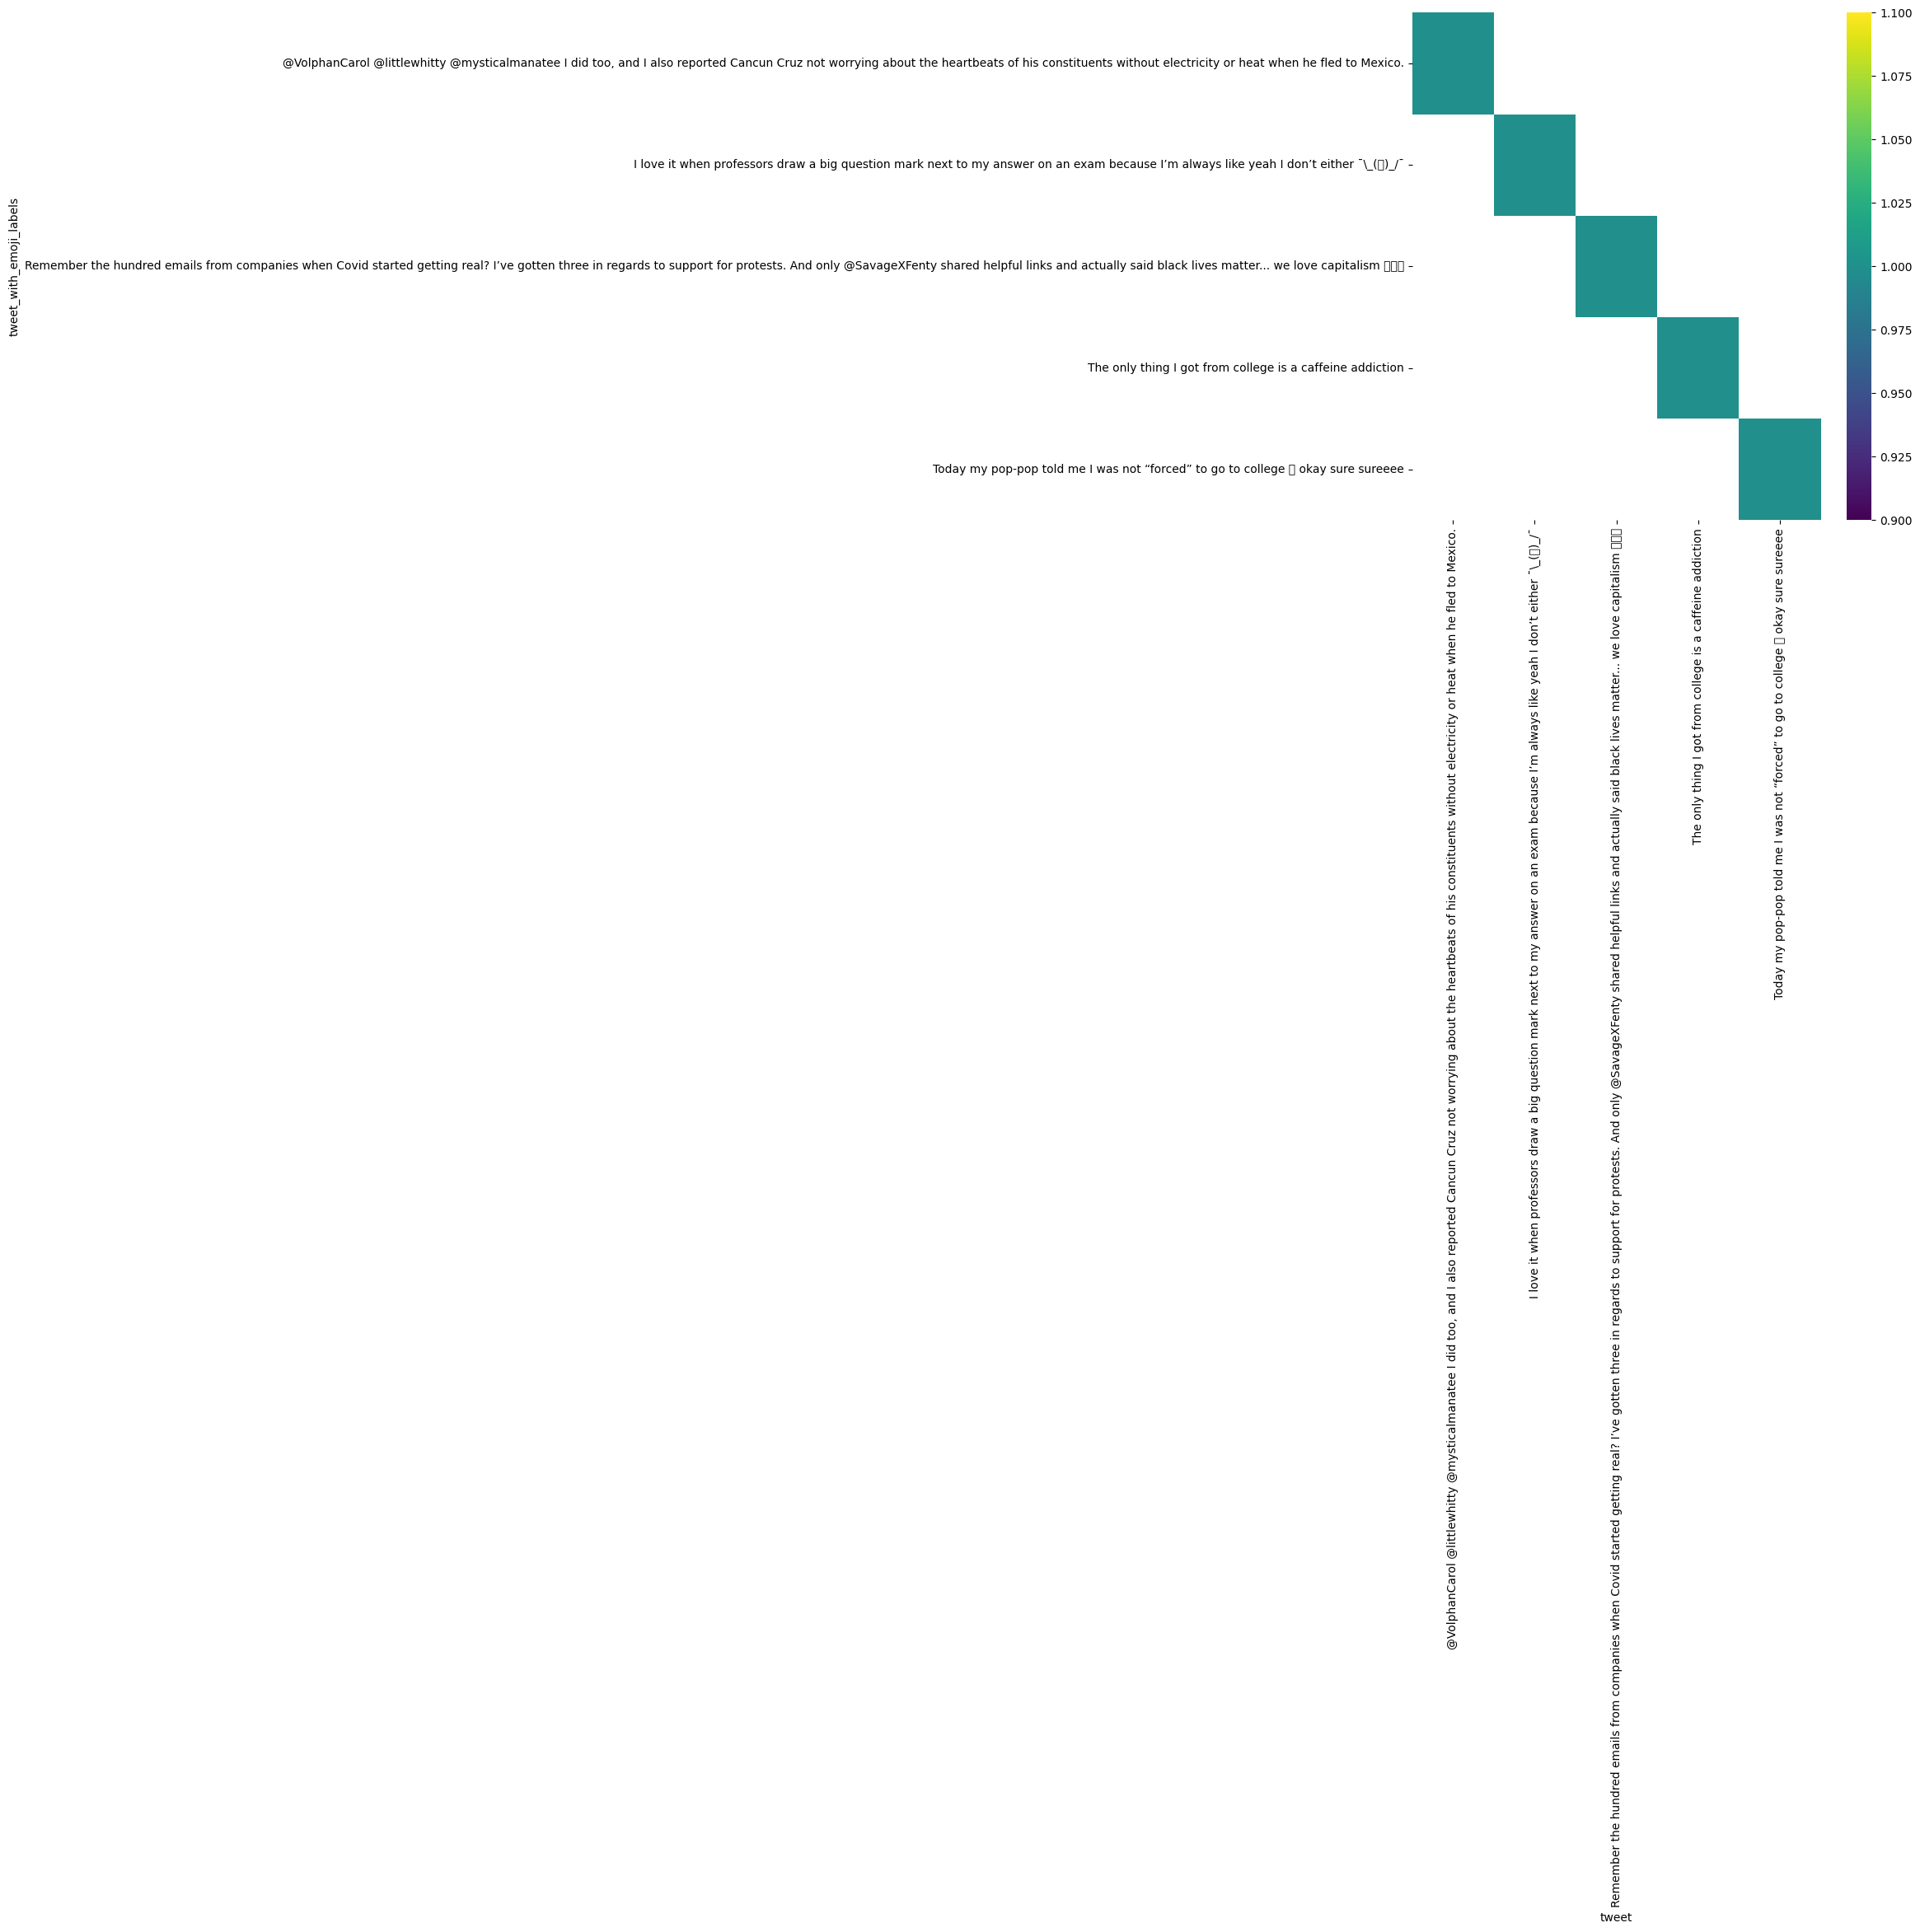

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tweet_with_emoji_labels'].value_counts()
    for x_label, grp in _df_27.groupby('tweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tweet')
_ = plt.ylabel('tweet_with_emoji_labels')

feature engineering cv last

In [36]:
import pandas as pd

# Load the dataset
file_path = '/content/Sarcasm.csv'
data = pd.read_csv('/content/Sarcasm.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Extract features and target variable
X_text = data['tweet']
y = data['sarcastic']

# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text_tfidf = tfidf.fit_transform(X_text)

# Create a DataFrame for the additional features and concatenate with the TF-IDF text features
additional_features = data[['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']].fillna(0)
X = pd.concat([pd.DataFrame(X_text_tfidf.toarray()), additional_features.reset_index(drop=True)], axis=1)

# Initialize classifier and cross-validation
clf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)  # Sensitivity is the recall for the positive class
f1 = f1_score(y, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display results
conf_matrix, accuracy, precision, sensitivity, specificity, f1

# Fill any NaN values in the 'tweet' column with an empty string to enable TF-IDF processing
X_text = X_text.fillna('')

# Re-run the TF-IDF transformation and the subsequent steps
X_text_tfidf = tfidf.fit_transform(X_text)

# Concatenate text features and additional features
X = pd.concat([pd.DataFrame(X_text_tfidf.toarray()), additional_features.reset_index(drop=True)], axis=1)

# Perform cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Recalculate evaluation metrics
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display results
conf_matrix, accuracy, precision, sensitivity, specificity, f1

# Redefine the additional features
additional_features = data[['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']].fillna(0)

# Concatenate text features and additional features
X = pd.concat([pd.DataFrame(X_text_tfidf.toarray()), additional_features.reset_index(drop=True)], axis=1)

# Perform cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Recalculate evaluation metrics
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display results
conf_matrix, accuracy, precision, sensitivity, specificity, f1

from sklearn.ensemble import RandomForestClassifier

# Redefine the classifier
clf = RandomForestClassifier(random_state=42)

# Perform cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Recalculate evaluation metrics
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)  # Sensitivity is the recall for the positive class
f1 = f1_score(y, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display results
conf_matrix, accuracy, precision, sensitivity, specificity, f1



ValueError: np.nan is an invalid document, expected byte or unicode string.

In [38]:
import pandas as pd

# Load the dataset
file_path = '/content/Sarcasm.csv'
data = pd.read_csv('/content/Sarcasm.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Extract features and target variable
X_text = data['tweet']
y = data['sarcastic']

# Fill any NaN values in the 'tweet' column with an empty string to enable TF-IDF processing
# This is crucial to avoid the ValueError you encountered
X_text = X_text.fillna('')

# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text_tfidf = tfidf.fit_transform(X_text)

# Create a DataFrame for the additional features and concatenate with the TF-IDF text features
additional_features = data[['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']].fillna(0)

# Convert TF-IDF matrix to DataFrame with string column names
X_text_tfidf_df = pd.DataFrame(X_text_tfidf.toarray())
X_text_tfidf_df.columns = X_text_tfidf_df.columns.astype(str)  # Convert column names to strings

# Concatenate text features and additional features
X = pd.concat([X_text_tfidf_df, additional_features.reset_index(drop=True)], axis=1)
# Initialize classifier and cross-validation
clf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)  # Sensitivity is the recall for the positive class
f1 = f1_score(y, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display results
conf_matrix, accuracy, precision, sensitivity, specificity, f1

(array([[2601,    0],
        [   0,  867]]),
 1.0,
 1.0,
 1.0,
 1.0,
 1.0)

In [40]:
# Remove potential leaky features: sarcasm, irony, satire, understatement, overstatement, rhetorical_question
X_non_leaky = pd.DataFrame(X_text_tfidf.toarray())

# Redefine classifier and evaluation lists
clf = RandomForestClassifier(random_state=42)
conf_matrices, accuracies, precisions, sensitivities, specificities, f1_scores = [], [], [], [], [], []

# Perform 5-fold cross-validation and compute metrics for each fold
for train_index, test_index in cv.split(X_non_leaky, y):
    # Split data
    X_train, X_test = X_non_leaky.iloc[train_index], X_non_leaky.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    clf.fit(X_train, y_train)
    y_pred_fold = clf.predict(X_test)

    # Calculate metrics for this fold
    conf_matrix_fold = confusion_matrix(y_test, y_pred_fold)
    accuracy_fold = accuracy_score(y_test, y_pred_fold)
    precision_fold = precision_score(y_test, y_pred_fold)
    sensitivity_fold = recall_score(y_test, y_pred_fold)  # Sensitivity is recall for the positive class
    f1_fold = f1_score(y_test, y_pred_fold)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix_fold.ravel()
    specificity_fold = tn / (tn + fp)

    # Append results for this fold
    conf_matrices.append(conf_matrix_fold)
    accuracies.append(accuracy_fold)
    precisions.append(precision_fold)
    sensitivities.append(sensitivity_fold)
    specificities.append(specificity_fold)
    f1_scores.append(f1_fold)

# Display results
fold_results_non_leaky = {
    'Confusion Matrices': conf_matrices,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Sensitivity': sensitivities,
    'Specificity': specificities,
    'F1 Score': f1_scores
}

fold_results_non_leaky

# Redefine the classifier with fewer trees for faster execution
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Reinitialize evaluation lists for fold results
conf_matrices, accuracies, precisions, sensitivities, specificities, f1_scores = [], [], [], [], [], []

# Perform 5-fold cross-validation and compute metrics for each fold
for train_index, test_index in cv.split(X_non_leaky, y):
    # Split data
    X_train, X_test = X_non_leaky.iloc[train_index], X_non_leaky.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    clf.fit(X_train, y_train)
    y_pred_fold = clf.predict(X_test)

    # Calculate metrics for this fold
    conf_matrix_fold = confusion_matrix(y_test, y_pred_fold)
    accuracy_fold = accuracy_score(y_test, y_pred_fold)
    precision_fold = precision_score(y_test, y_pred_fold)
    sensitivity_fold = recall_score(y_test, y_pred_fold)  # Sensitivity is recall for the positive class
    f1_fold = f1_score(y_test, y_pred_fold)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix_fold.ravel()
    specificity_fold = tn / (tn + fp)

    # Append results for this fold
    conf_matrices.append(conf_matrix_fold)
    accuracies.append(accuracy_fold)
    precisions.append(precision_fold)
    sensitivities.append(sensitivity_fold)
    specificities.append(specificity_fold)
    f1_scores.append(f1_fold)

# Display results
fold_results_non_leaky = {
    'Confusion Matrices': conf_matrices,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Sensitivity': sensitivities,
    'Specificity': specificities,
    'F1 Score': f1_scores
}

fold_results_non_leaky


{'Confusion Matrices': [array([[467,  53],
         [144,  30]]),
  array([[467,  53],
         [147,  27]]),
  array([[459,  62],
         [153,  20]]),
  array([[481,  39],
         [156,  17]]),
  array([[480,  40],
         [153,  20]])],
 'Accuracy': [0.7161383285302594,
  0.7118155619596542,
  0.6902017291066282,
  0.7186147186147186,
  0.7215007215007215],
 'Precision': [0.3614457831325301,
  0.3375,
  0.24390243902439024,
  0.30357142857142855,
  0.3333333333333333],
 'Sensitivity': [0.1724137931034483,
  0.15517241379310345,
  0.11560693641618497,
  0.09826589595375723,
  0.11560693641618497],
 'Specificity': [0.8980769230769231,
  0.8980769230769231,
  0.8809980806142035,
  0.925,
  0.9230769230769231],
 'F1 Score': [0.23346303501945526,
  0.2125984251968504,
  0.1568627450980392,
  0.14847161572052403,
  0.17167381974248927]}